In [1]:
import pandas as pd
import os

In [2]:
DogeDaily = os.path.join('Resources/DogecoinDaily.csv')
DogeD_df = pd.read_csv(DogeDaily)
DogeD_df

,Date,Price,Open,High,Low,Vol.,Change %
0,2-Mar-23,0.080437,0.081944,0.082257,0.079635,568.17M,-1.84%
1,1-Mar-23,0.081945,0.080809,0.082821,0.080298,621.10M,1.43%
2,28-Feb-23,0.080792,0.081354,0.083037,0.079929,1.11B,-0.66%
3,27-Feb-23,0.081333,0.082214,0.082256,0.079979,751.01M,-1.08%
4,26-Feb-23,0.082219,0.080742,0.082567,0.080434,583.64M,1.83%
...,...,...,...,...,...,...,...
1517,5-Jan-19,0.002249,0.002243,0.002268,0.002211,409.37M,0.25%
1518,4-Jan-19,0.002243,0.002293,0.002295,0.002185,542.08M,-2.18%
1519,3-Jan-19,0.002293,0.002350,0.002356,0.002291,538.78M,-2.41%
1520,2-Jan-19,0.002350,0.002347,0.002364,0.002328,301.97M,0.13%


In [3]:
DogeD_df['Date'] = pd.to_datetime(DogeD_df['Date'])
DogeD_df['Day'] = DogeD_df['Date'].dt.day_name()
DogeD_df

,Date,Price,Open,High,Low,Vol.,Change %,Day
0,2023-03-02,0.080437,0.081944,0.082257,0.079635,568.17M,-1.84%,Thursday
1,2023-03-01,0.081945,0.080809,0.082821,0.080298,621.10M,1.43%,Wednesday
2,2023-02-28,0.080792,0.081354,0.083037,0.079929,1.11B,-0.66%,Tuesday
3,2023-02-27,0.081333,0.082214,0.082256,0.079979,751.01M,-1.08%,Monday
4,2023-02-26,0.082219,0.080742,0.082567,0.080434,583.64M,1.83%,Sunday
...,...,...,...,...,...,...,...,...
1517,2019-01-05,0.002249,0.002243,0.002268,0.002211,409.37M,0.25%,Saturday
1518,2019-01-04,0.002243,0.002293,0.002295,0.002185,542.08M,-2.18%,Friday
1519,2019-01-03,0.002293,0.002350,0.002356,0.002291,538.78M,-2.41%,Thursday
1520,2019-01-02,0.002350,0.002347,0.002364,0.002328,301.97M,0.13%,Wednesday


In [4]:
DogeD_df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
Day                 object
dtype: object

In [5]:
for column in DogeD_df.columns:
    print(f"Column {column} has {DogeD_df[column].isnull().sum()}null values")

Column Date has 0null values
Column Price has 0null values
Column Open has 0null values
Column High has 0null values
Column Low has 0null values
Column Vol. has 0null values
Column Change % has 0null values
Column Day has 0null values


In [6]:
# Remove customer ID column
DogeD_df.drop(columns=["Open", "High", "Low", "Vol.", "Change %", "Date"], inplace=True)
DogeD_df.head()

,Price,Day
0,0.080437,Thursday
1,0.081945,Wednesday
2,0.080792,Tuesday
3,0.081333,Monday
4,0.082219,Sunday


In [7]:
DogeD_df['Day1'] = DogeD_df.loc[:, 'Day']
DogeD_df

,Price,Day,Day1
0,0.080437,Thursday,Thursday
1,0.081945,Wednesday,Wednesday
2,0.080792,Tuesday,Tuesday
3,0.081333,Monday,Monday
4,0.082219,Sunday,Sunday
...,...,...,...
1517,0.002249,Saturday,Saturday
1518,0.002243,Friday,Friday
1519,0.002293,Thursday,Thursday
1520,0.002350,Wednesday,Wednesday


In [8]:
# Transform string column
def change_string(Day1):
    if Day1 == "Monday":
        return 1
    if Day1 == "Tuesday":
        return 2
    if Day1 == "Wednesday":
        return 3
    if Day1 == "Thursday":
        return 4
    if Day1 == "Friday":
        return 5
    if Day1 == "Saturday":
        return 6
    else:
        return 0
    
DogeD_df["Day1"] = DogeD_df["Day1"].apply(change_string)
DogeD_df.head()

,Price,Day,Day1
0,0.080437,Thursday,4
1,0.081945,Wednesday,3
2,0.080792,Tuesday,2
3,0.081333,Monday,1
4,0.082219,Sunday,0


In [9]:
DogeDay_df = DogeD_df.groupby(by='Day').mean().sort_values(by= "Day1")
DogeDay_df

,Price,Day1
Day,,
Sunday,0.077497,0.0
Monday,0.076729,1.0
Tuesday,0.076472,2.0
Wednesday,0.077113,3.0
Thursday,0.076547,4.0
Friday,0.077790,5.0
Saturday,0.077451,6.0


In [10]:
# Saving cleaned data
file_path = "Resources/DogeDay_df.csv"
DogeD_df.to_csv(file_path, index=False)

In [11]:
import matplotlib.pyplot as plt

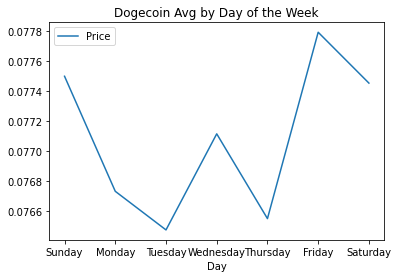

In [14]:
DogeDay_df.drop("Day1", axis=1).plot ()
x = ('Day')
y= ('Price')
plt.title("Dogecoin Avg by Day of the Week")
plt.show()